In [1]:
from function import *
import xarray as xr


ds_merge=load_all_ds()

c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


gogogo


c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 174
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 14
  result = blockwise(
c:\Users\zpy10\Anacon

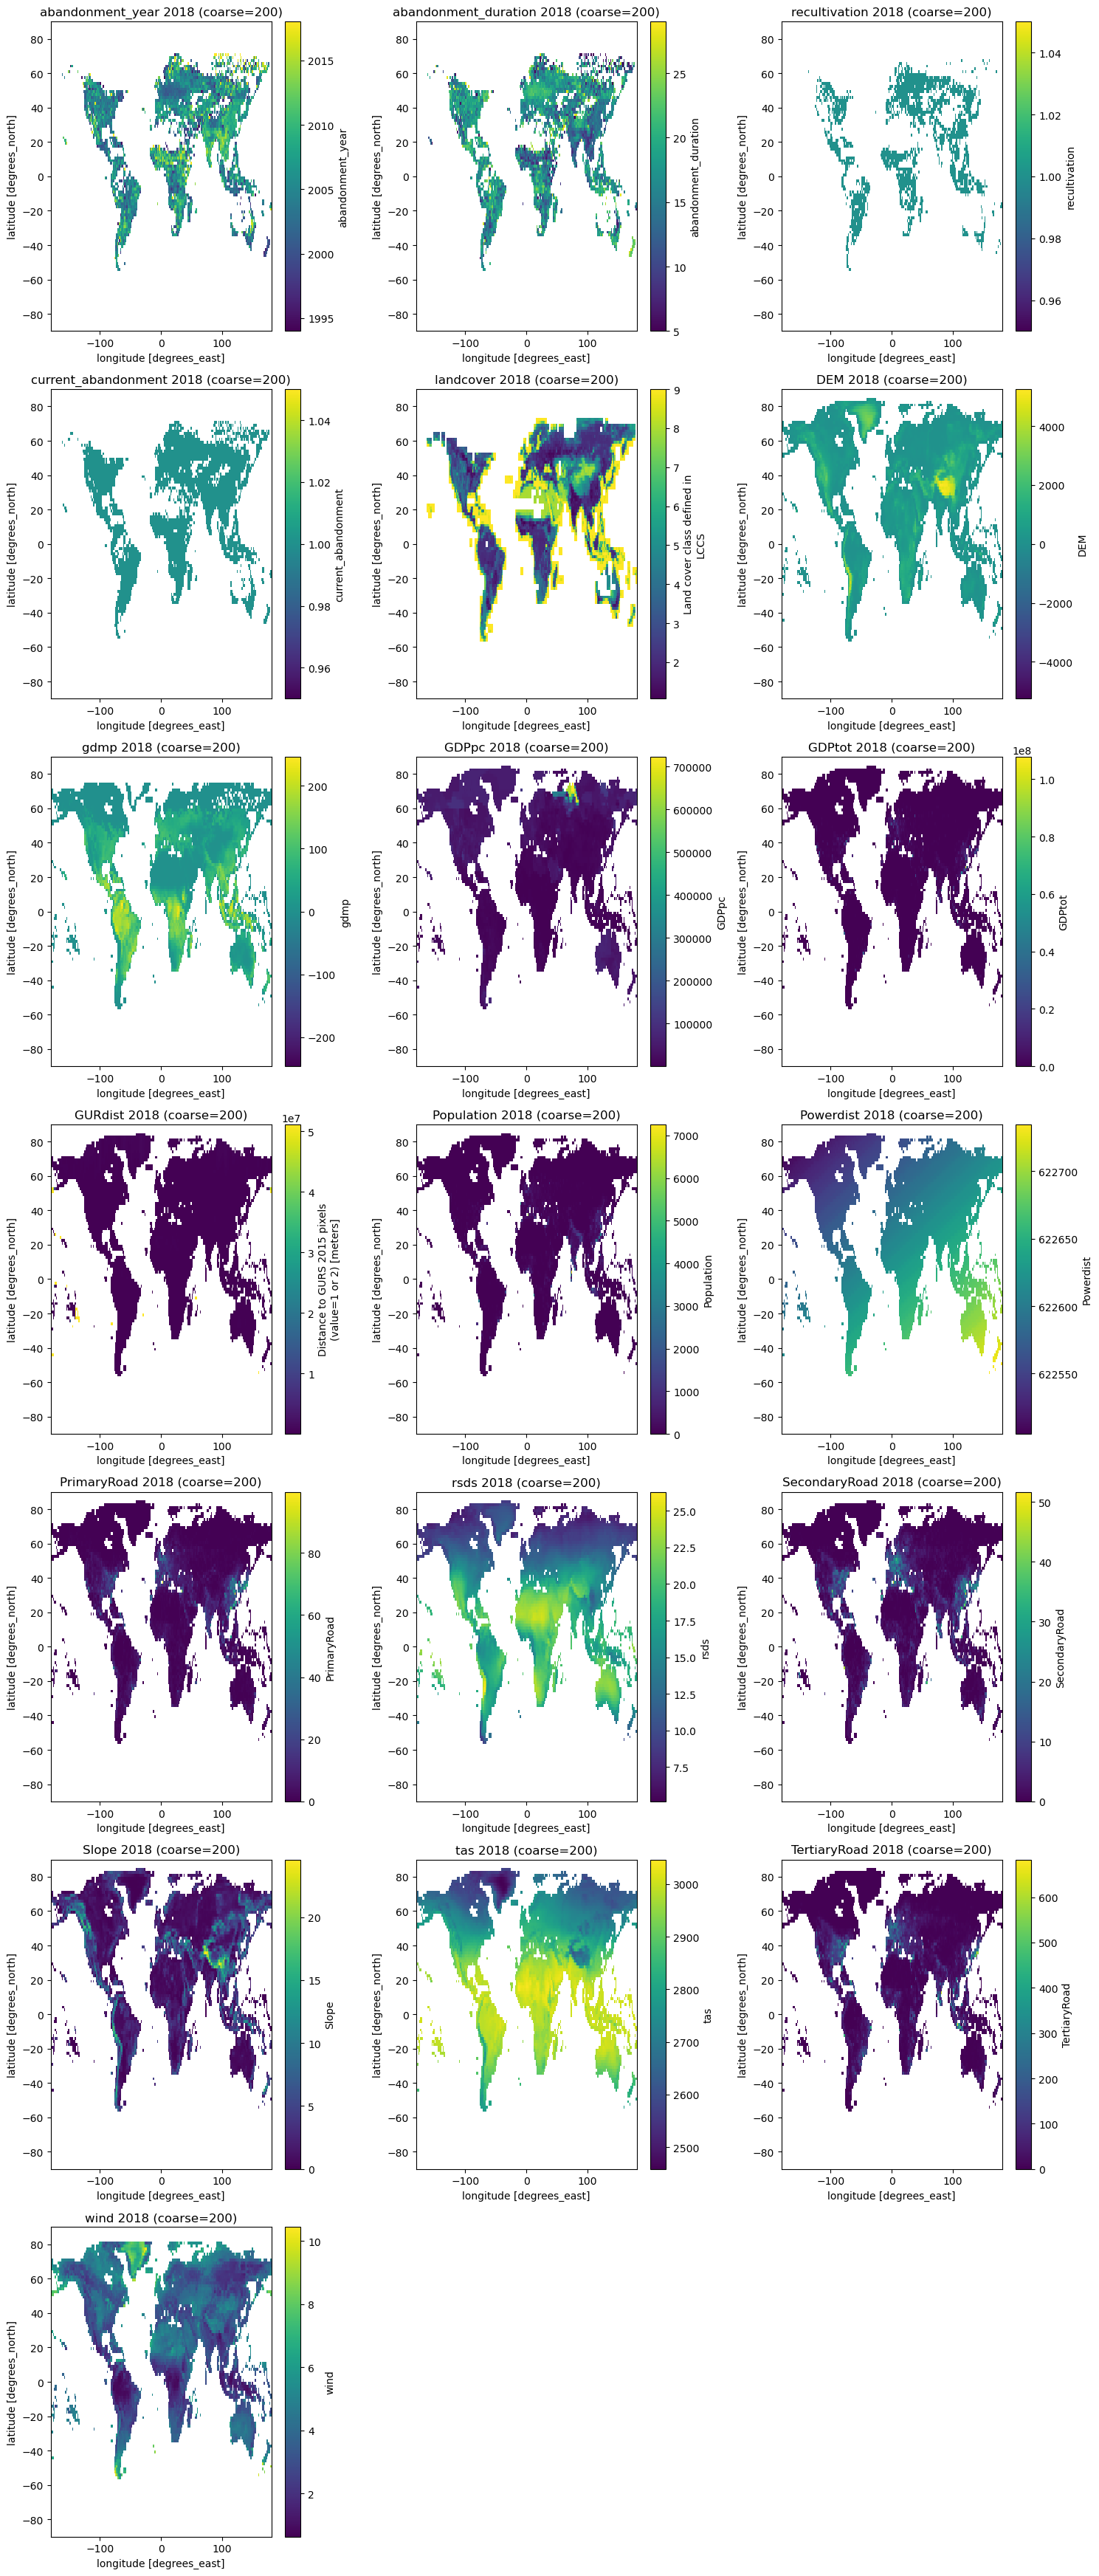

In [6]:
# Plot DEM, slope and GDMP for 2020
import matplotlib.pyplot as plt

# Get all variables from ds_merge
variables = list(ds_merge.data_vars)

# Create a figure with appropriate size
n_vars = len(variables)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot each variable
for idx, var_name in enumerate(variables):
    var = ds_merge[var_name]
    
    # Check if variable has time dimension
    if 'time' in var.dims:
        # Plot for year 2018 with coarse=200
        var.sel(time='2018').coarsen(lat=200, lon=200).mean().plot(ax=axes[idx], cmap='viridis')
        axes[idx].set_title(f'{var_name} 2018 (coarse=200)')
    else:
        # Plot without time selection, with coarse=200
        var.coarsen(lat=200, lon=200).mean().plot(ax=axes[idx], cmap='viridis')
        axes[idx].set_title(f'{var_name} (coarse=200)')

# Remove empty subplots if any
for idx in range(len(variables), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [10]:
# Print the type of 'lat' dimension for each variable
for var_name in ds_merge.data_vars:
    var = ds_merge[var_name]
    print(f"{var_name}: {var.lat.dtype}")

abandonment_year: float64
abandonment_duration: float64
recultivation: float64
current_abandonment: float64
landcover: float64
DEM: float64
GDPpc: float64
GDPtot: float64
GURdist: float64
Population: float64
Powerdist: float64
PrimaryRoad: float64
SecondaryRoad: float64
Slope: float64
TertiaryRoad: float64
gdmp: float64
rsds: float64
tas: float64
wind: float64
